In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
palette = sns.color_palette("Set2", 10)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.8)

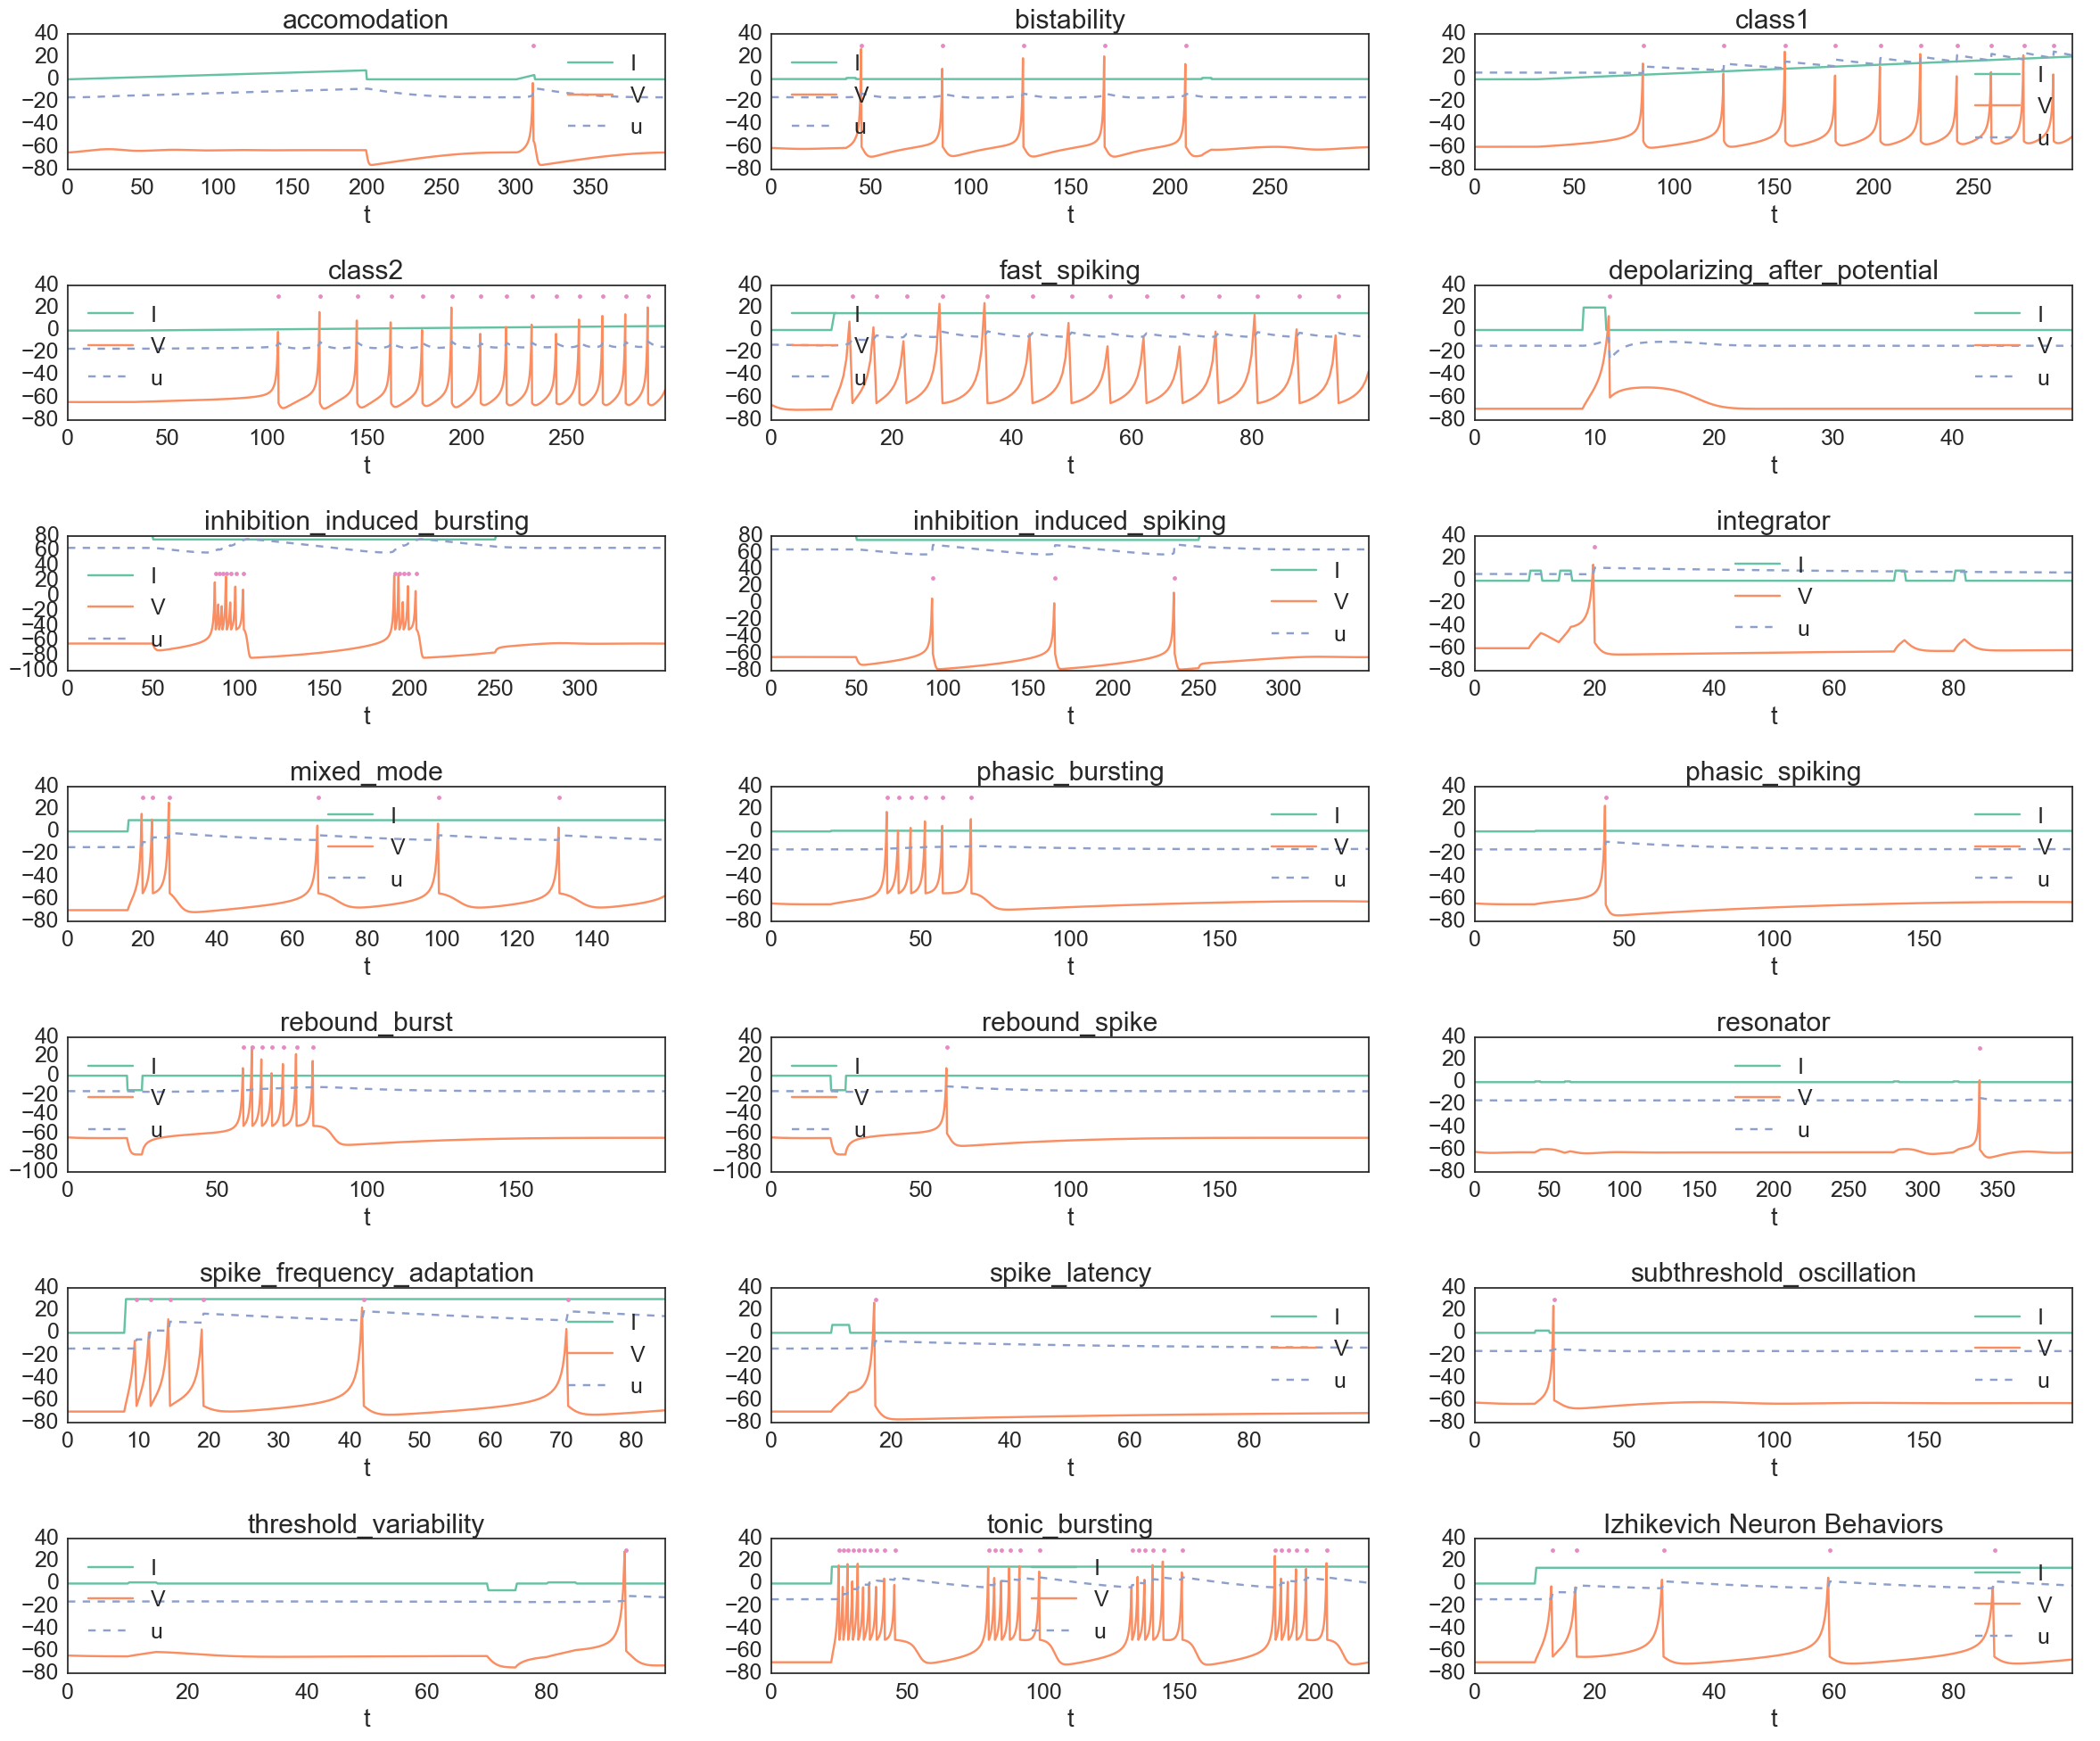

In [24]:
def plot_neuron(name, ax):
    data = pd.read_csv('./tests/results/%s.csv' % name, index_col=0)
    data[["I", "V", "u"]].plot(style=["-", "-", "--"], title=name, ax=ax)

    spikes = data["spike"]
    spikes = spikes[spikes != 0]
    spikes.plot(style=["."], ax=ax)

names = [
  "accomodation",
  "bistability",
  "class1",
  "class2",
  "fast_spiking",
  "depolarizing_after_potential",
  "inhibition_induced_bursting",
  "inhibition_induced_spiking",
  "integrator",
  "mixed_mode",
  "phasic_bursting",
  "phasic_spiking",
  "rebound_burst",
  "rebound_spike",
  "resonator",
  "spike_frequency_adaptation",
  "spike_latency",
  "subthreshold_oscillation",
  "threshold_variability",
  "tonic_bursting",
  "tonic_spiking",
]
fig, axes = plt.subplots(7, 3, figsize=(24, 20))
for name, ax in zip(names, axes.flatten()):
    plot_neuron(name, ax)
plt.tight_layout()

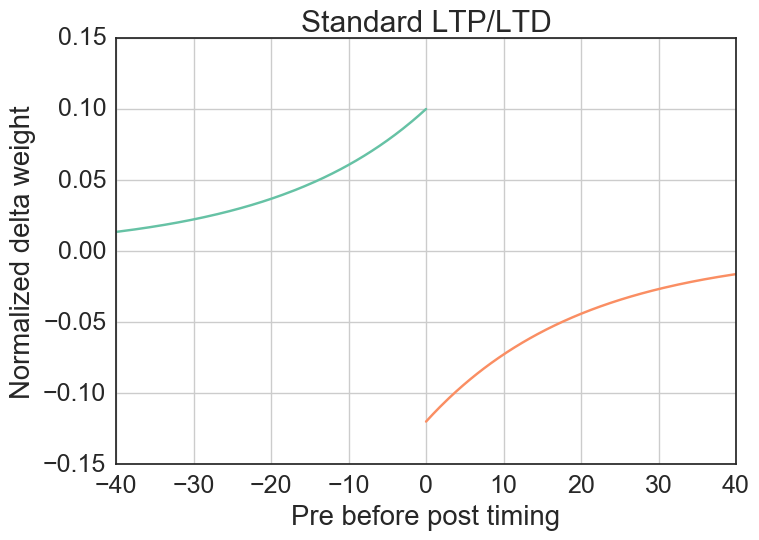

In [25]:
ltp = pd.read_csv('./tests/results/stdp_ltp.csv')
ltd = pd.read_csv('./tests/results/stdp_ltd.csv')

plt.plot(ltp["t"], ltp["d"])
plt.plot(ltd["t"], ltd["d"])

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("Standard LTP/LTD")

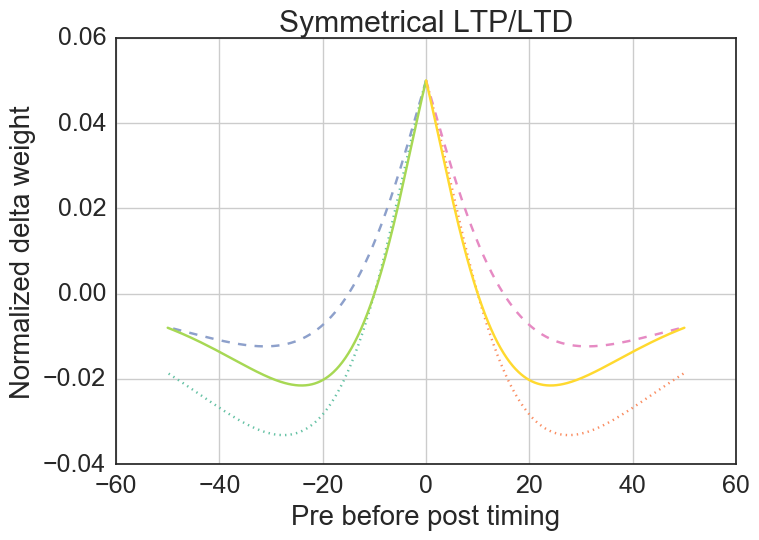

In [26]:
ltp = pd.read_csv('./tests/results/sym_ltp.csv')
ltd = pd.read_csv('./tests/results/sym_ltd.csv')

ltp1 = pd.read_csv('./tests/results/sym_ltp_1.csv')
ltd1 = pd.read_csv('./tests/results/sym_ltd_1.csv')

ltp2 = pd.read_csv('./tests/results/sym_ltp_2.csv')
ltd2 = pd.read_csv('./tests/results/sym_ltd_2.csv')

plt.plot(ltp1["t"], ltp1["d"], ":")
plt.plot(ltd1["t"], ltd1["d"], ":")

plt.plot(ltp2["t"], ltp2["d"], "--")
plt.plot(ltd2["t"], ltd2["d"], "--")

plt.plot(ltp["t"], ltp["d"], "-")
plt.plot(ltd["t"], ltd["d"], "-")

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("Symmetrical LTP/LTD")

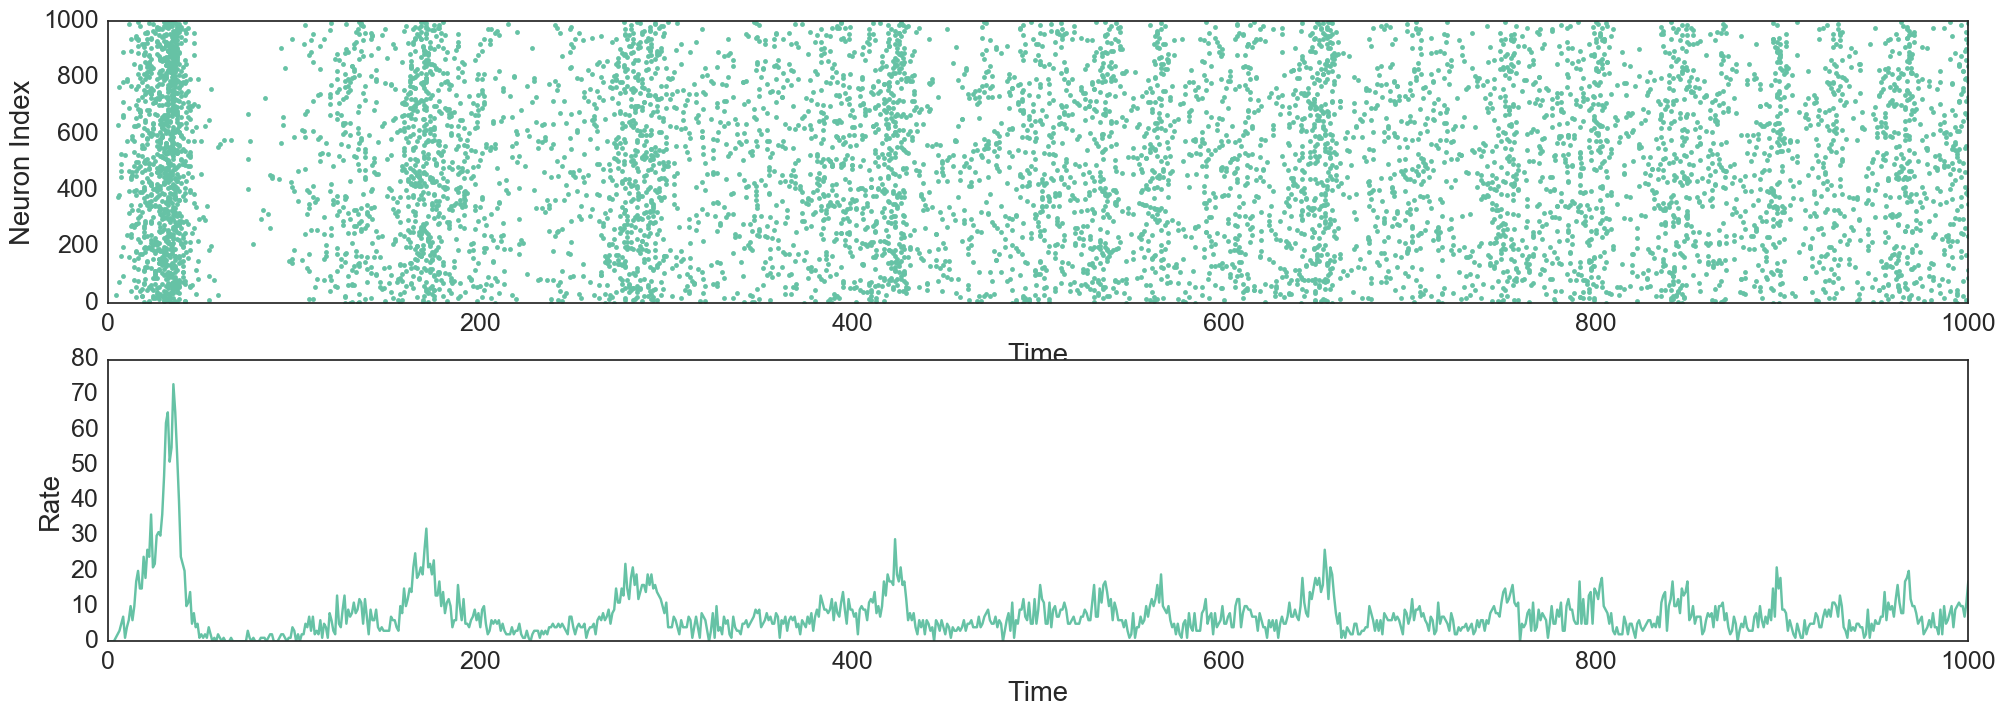

In [34]:
spikes = pd.read_csv('./examples/results/spikes.csv')
rates = pd.read_csv('./examples/results/spikes_rate.csv')

plt.figure(figsize=(24,8))
plt.title("Spiking Network")

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(spikes["t"], spikes["i"], ".")
ax1.set_xlabel("Time")
ax1.set_ylabel("Neuron Index")

ax2.plot(rates["t"], rates["rate"])
ax2.set_xlabel("Time")
ax2.set_ylabel("Rate")

In [41]:
palette = sns.color_palette("Set1", 10)

def plot_window(spikes, rates, t_offset, t_window):
    spikes = spikes[(spikes['t'] > t_offset) & (spikes['t'] < t_offset + t_window)]
    rates = rates[(rates['t'] > t_offset) & (rates['t'] < t_offset + t_window)]

    plt.figure(figsize=(24,8))
    plt.title("STDP Network")

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    exc_spikes = spikes[spikes["i"] < 800]
    inh_spikes = spikes[spikes["i"] >= 800]
    ax1.plot(exc_spikes["t"], exc_spikes["i"], ".")
    ax1.plot(inh_spikes["t"], inh_spikes["i"], ".")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Neuron Index")

    ax2.plot(rates["t"], rates["rate"])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Rate")

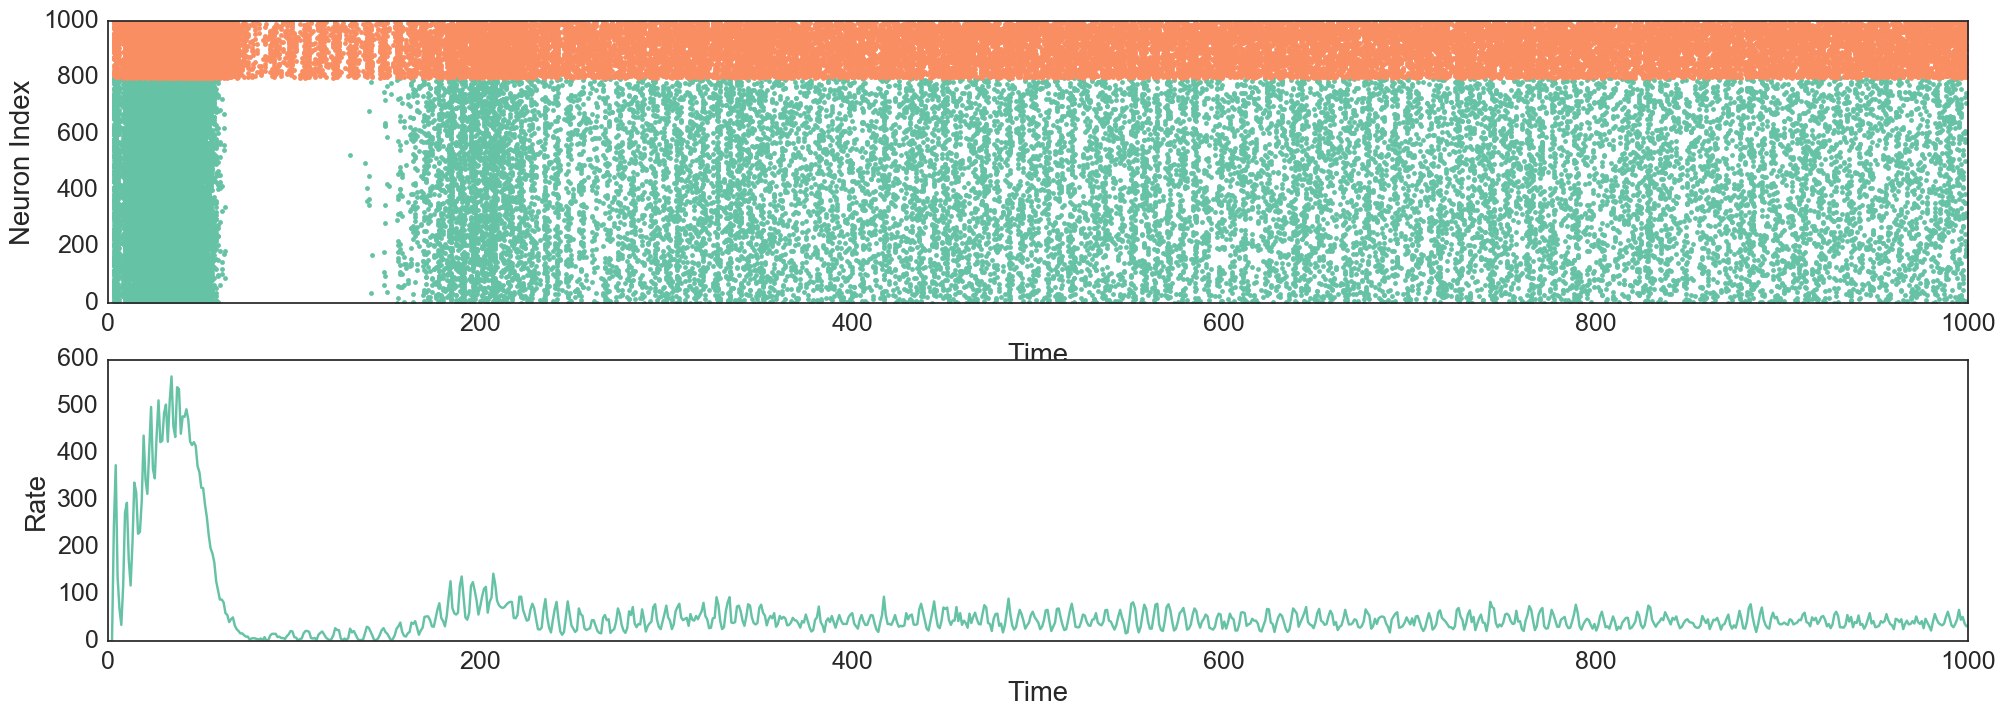

In [42]:
spikes = pd.read_csv('./examples/results/stdp.csv')
rates = pd.read_csv('./examples/results/stdp_rate.csv')

window_limit = 1000
window_size = 1000

window_offset = 0
while True:
    plot_window(spikes, rates, window_offset, window_size)
    window_offset += window_size
    if window_offset >= window_limit:
        break